In [ ]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [3]:
from typing import Any, cast, Dict

import numpy as np
import matplotlib.pyplot as plt

import swcgeom
from swcgeom.analysis import draw, Sholl, Feature, extract_feature

In [4]:
swc1 = "data/101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "data/101711-11_16-of-16_initial.CNG.swc"
swc3 = "data/1059283677_15257_2226-X16029-Y23953.swc"

# create a tree
tree1 = swcgeom.Tree.from_swc(swc1)
tree2 = swcgeom.Tree.from_swc(swc2)
tree3 = swcgeom.Tree.from_eswc(swc3)

population = swcgeom.Population.from_swc("data/")

===== Single Feature =====
length [53405.574]
===== Feature List =====
[array([53405.574], dtype=float32)]
===== Features =====
--- length ---
(1,)
--- node_radial_distance ---
(5514,)
--- node_branch_order ---
(140,)
--- branch_length ---
(287,)
--- path_length ---
(148,)
--- sholl ---
(20,)


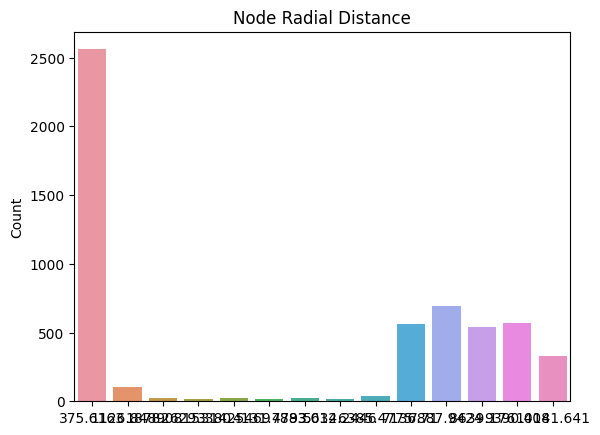

In [5]:
features = extract_feature(tree3)
all_features: Dict[Feature, Dict] = {
    "length": {},
    "node_radial_distance": {},
    "node_branch_order": {},
    "branch_length": {},
    "path_length": {},
    "sholl": {},
}

print("===== Single Feature =====")
print("length", features.get("length"))

print("===== Feature List =====")
with np.printoptions(threshold=10):
    print(features.get(["length"]))

print("===== Features =====")
with np.printoptions(threshold=10):
    for k, v in features.get(all_features).items():
        print(f"--- {k} ---")
        print(v.shape)

_ = features.plot("node_radial_distance")

===== Single Feature =====
length [[ 3632.4885]
 [ 6833.212 ]
 [53405.574 ]]
===== Features =====


/home/yzx9/src/swcgeom/swcgeom/core/swc.py:251: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(


--- length ---
[(1,), (1,), (1,)]
--- node_radial_distance ---
[(5514,), (5514,), (5514,)]
--- node_branch_order ---
[(140,), (140,), (140,)]
--- branch_length ---
[(287,), (287,), (287,)]
--- path_length ---
[(148,), (148,), (148,)]
--- sholl ---
[(20,), (20,), (20,)]


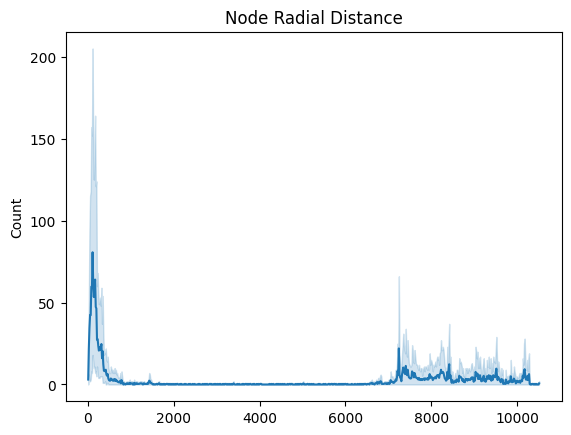

In [6]:
features = extract_feature(population)

print("===== Single Feature =====")
print("length", features.get("length"))

print("===== Features =====")
for k, v in features.get(all_features).items():
    print(f"--- {k} ---")
    print([vv.shape for vv in v])

_ = features.plot("node_radial_distance")

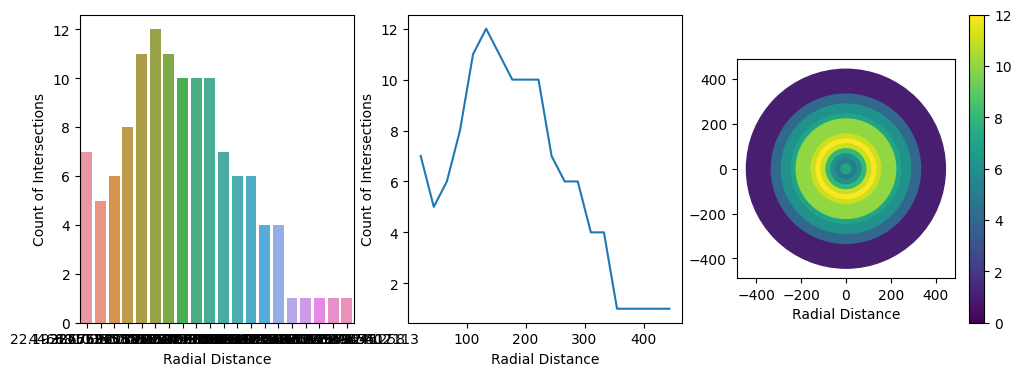

In [17]:
from swcgeom.analysis import Sholl

sholl = Sholl(tree1)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig, ax = sholl.plot(kind="bar", ax=ax0)
fig, ax = sholl.plot(kind="linechart", ax=ax1)
fig, ax = sholl.plot(kind="circles", ax=ax2)

In [8]:
from swcgeom.analysis import BranchFeatures

angles = BranchFeatures(tree1).get_angle()
print(angles.shape)
print(angles.min())
print(angles.max())

(35, 35)
0.0
3.1412473
